<a href="https://colab.research.google.com/github/HamburgermanA3445/mlprojects/blob/main/PredictingStudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and data

https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import kernels, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import GridSearchCV

In [ ]:
student_data = pd.read_csv("/content/Student Performance Dataset.zip")
student_data = student_data.dropna(axis=0) #removing null

In [ ]:
student_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# Logisitic Regression

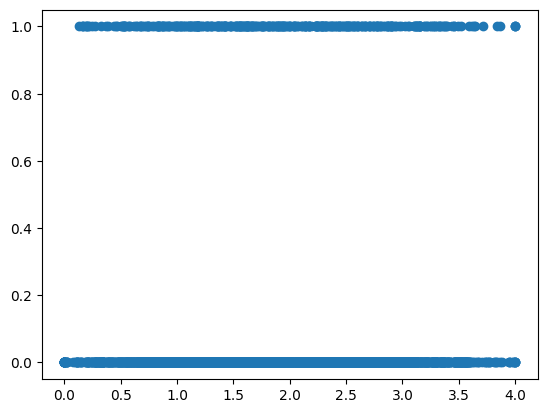

In [ ]:
plt.scatter(student_data['GPA'],student_data['Volunteering'])

In [ ]:
#I tried these features for predicting gradeclass
feats = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'ParentalSupport']
temp_dict = {}
for z in feats:
  lg_X=student_data[[z]]
  lg_y= student_data['GradeClass']
  lgX_train, lgX_test, lgy_train, lgy_test = train_test_split(lg_X, lg_y, test_size=0.2, random_state=42)
  lg=LogisticRegression()
  lg.fit(lgX_train, lgy_train)
  lgy_pred = lg.predict(lgX_test)
  lg.score(lgX_test, lgy_test)
  temp_dict[""+z+" predicting "+a]=lg.score(lgX_test, lgy_test)
temp_dict = sorted(temp_dict.items(), key= lambda x: x[1])
print(f'{temp_dict[-1][0]} had the highest score of {temp_dict[-1][1]}')

Absences predicting Tutoring had the highest score of 0.6638830897703549


In [ ]:
#I also tried other combinations
binary_feats = ['Volunteering', 'Sports', 'Extracurricular', 'Music', 'Tutoring']
feats = ['GPA', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'ParentalSupport']
all_combos = {}
for z in feats:
  for a in binary_feats:
    lg_X=student_data[[z]]
    lg_y= student_data[a]
    lgX_train, lgX_test, lgy_train, lgy_test = train_test_split(lg_X, lg_y, test_size=0.2, random_state=42)
    lg=LogisticRegression()
    lg.fit(lgX_train, lgy_train)
    lgy_pred = lg.predict(lgX_test)
    lg.score(lgX_test, lgy_test)
    all_combos[""+z+" predicting "+a]=lg.score(lgX_test, lgy_test)
all_combos = sorted(all_combos.items(), key= lambda x: x[1])
print(f'{all_combos[-1][0]} had the highest score of {all_combos[-1][1]}')

ParentalSupport predicting Volunteering had the highest score of 0.8392484342379958


#Setting 12 features and target feature (GPA) for regression models

In [ ]:
#features and target
student_features = ['Age', 'Gender' , 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
target_feature = 'GPA'

X = student_data[student_features]
y = student_data[target_feature]

#Comparing 5 Regression Models for 12 Features

(Using 8 features had less r2 score of around 80-90, if not worse, across all models)

In [ ]:
#initializing 5 models
rf = RandomForestRegressor(max_depth=4,random_state=42)
et = ExtraTreesRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
gpr = GaussianProcessRegressor(random_state=42, alpha=0.1, kernel = DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), normalize_y=True)

In [ ]:
#training and testing results lists to store in
atrain_mse = []
atrain_r2 = []
atest_mse = []
atest_r2 = []
#splitting data
aX_train, aX_test, ay_train, ay_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#function for training and testing
def training(model, aX_train, aX_test, ay_train, ay_test):
    model.fit(aX_train, ay_train)
    ay_train_pred = model.predict(aX_train)
    ay_test_pred = model.predict(aX_test)
    atrain_mse.append(mean_squared_error(ay_train, ay_train_pred))
    atrain_r2.append(r2_score(ay_train, ay_train_pred))
    atest_mse.append(mean_squared_error(ay_test, ay_test_pred))
    atest_r2.append(r2_score(ay_test, ay_test_pred))

In [ ]:
#calling training function for each model
training(rf, aX_train, aX_test, ay_train, ay_test)
training(dt, aX_train, aX_test, ay_train, ay_test)
training(knn, aX_train, aX_test, ay_train, ay_test)
training(gpr, aX_train, aX_test, ay_train, ay_test)
training(et, aX_train, aX_test, ay_train, ay_test)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
#results
models = ["Random Forest", "Decision Tree", "k-Nearest Neighbors", "Gaussian Process", "Extra Trees"]
results = pd.DataFrame({
    "Model": models,
    "Training MSE": atrain_mse,
    "Training R2": atrain_r2,
    "Testing MSE": atest_mse,
    "Testing R2": atest_r2
})
print(results)

                 Model  Training MSE  Training R2  Testing MSE  Testing R2
0        Random Forest  8.999200e-02     0.892815     0.103948    0.874297
1        Decision Tree  8.687616e-02     0.896526     0.108945    0.868254
2  k-Nearest Neighbors  5.457469e-02     0.934999     0.083497    0.899028
3     Gaussian Process  3.849796e-02     0.954147     0.038657    0.953253
4          Extra Trees  8.211968e-30     1.000000     0.060259    0.927130


#Gaussian Process Regressor using 12 features -- Best Model Across the 5 Models

In [ ]:
#Splitting the data using 20% testing to 80% training data, I tested 25-75 and 30-70 and this 20-80 was the best ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#GridSearchCV found that this was the best kernel, although it barely increased the r2 score from RBF and matern also was barely worse
gpr = GaussianProcessRegressor(random_state=42, alpha=0.1, kernel = DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), normalize_y=True)

In [ ]:
gpr.fit(X_train, y_train)

y_train_pred = gpr.predict(X_train)
y_test_pred = gpr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
print(f"Test MSE: {test_mse}\nTest R2: {test_r2}")

Test MSE: 0.038688586285821426
Test R2: 0.9532143422216609


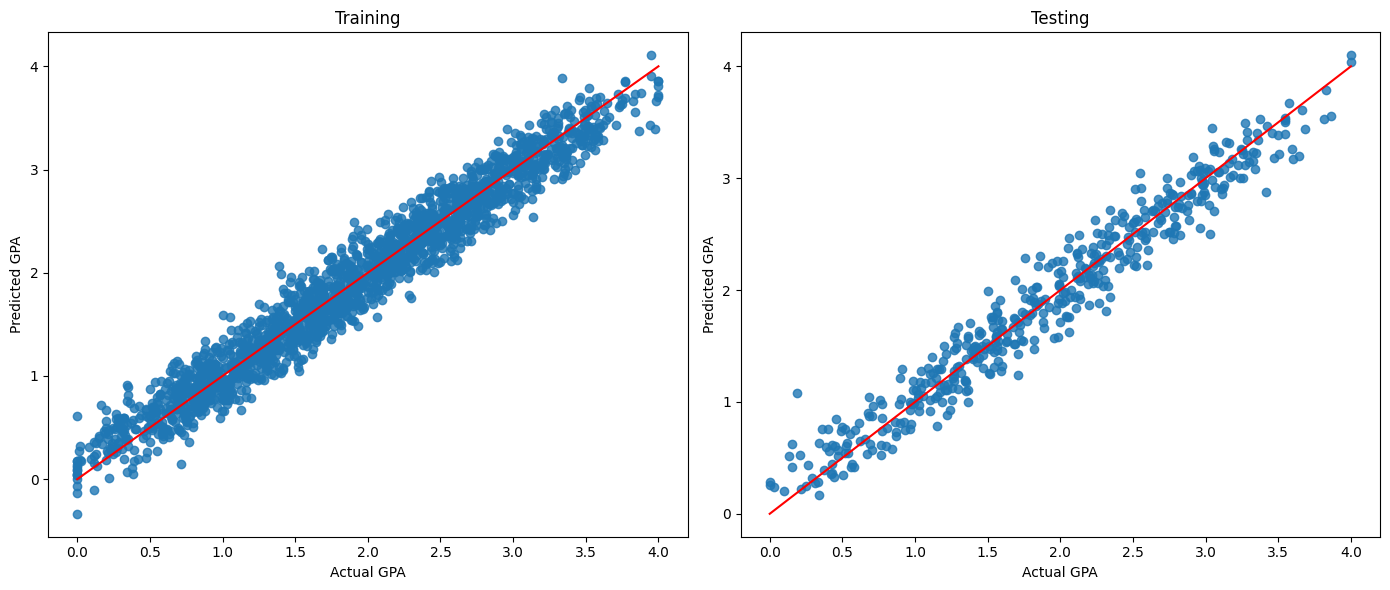

In [ ]:
#Graphing training and testing actual (x) vs predicted (y), y=x line represents the correct prediction where testing = training
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.8)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Training")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r-')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.8)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Testing")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-')

plt.tight_layout()
plt.show()

#Grid Search for Hyperparameter Tuning

GPR, along with the other models that I tried this with for optimizing the hyperparameters, the r2 score did not seem to increase much

In [ ]:
g1X_train, g1X_test, g1y_train, g1y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gpr = GaussianProcessRegressor(random_state=42, kernel = 1.0 * RBF(1.0))
params = {
    "alpha": [.1,.05,.01],
    "normalize_y": [False, True]
}
GS = GridSearchCV(estimator=gpr, param_grid=params, cv=5, scoring='r2', refit = 'r2')

GS.fit(g1X_train, g1y_train)

print(GS.best_params_)
print(GS.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


{'alpha': 0.1, 'normalize_y': True}
0.9530763781852098


In [ ]:
g2X_train, g2X_test, g2y_train, g2y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gpr = GaussianProcessRegressor(random_state=42, alpha=.1,normalize_y=True)
params = {
    "kernel": [1.0 * RBF(1.0), 1.0 * Matern(length_scale=1.0, nu=1.5), DotProduct() + WhiteKernel()]
}
GS = GridSearchCV(estimator=gpr, param_grid=params, cv=5, scoring='r2', refit = 'r2')

GS.fit(g2X_train, g2y_train)

print(GS.best_params_)
print(GS.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-package

{'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)}
0.953081038007934
